<a href="https://colab.research.google.com/github/damarismuli/Implementating-kNN-classifier-and-a-Naive-Bayes-classifier/blob/main/Naive_Bayes_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.Defining the Question

a) Specifying the Data Analytic Question

Implementing  a Naive Bayes classifier on spambase dataset so as to Predict column named 1 based on the numeric information given.Then calculate accuracy of the model.










b) Defining the Metric for Success


To determine the  model that will results to most accurate prediction of column named 1


c) Understanding the context

Naïve Bayes algorithm is a supervised learning algorithm, which is based on Bayes theorem and used for solving classification problems.It is one of the simple and most effective Classification algorithms which helps in building the fast machine learning models that can make quick predictions.Besides,it is a probabilistic classifier, which means it predicts on the basis of the probability of an object.

d) Recording the Experimental Design

In this project ,i imported the necessary libraries,loaded and explored datasets,Cleaned and verified data, performed Exploratory Data Analysis;Univariate, Bivariate and Multivariate Analysis to check on one variable, relationships and differences between different independent variables and the coorelation of the variables respectively.Used train set to create train and test data.Implemented the Naive Bayes classifier.Did performance evalution,cross validation,applied optimization technique  and finally gave conclusion and recommendation.

e) Data Relevance

The data provided was relevant to building a model that implement a Naive Bayes classifier:https://archive.ics.uci.edu/ml/datasets/Spambase
It was easy to work with since it contained  numerical values in all columns 

2.Reading the Data

In [229]:
#Importing Our Libraries
import pandas as pd
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [230]:
# spambase.names
with open('spambase.names') as fp:
    cols = []
    for line in fp:
        sre = re.match(r'(?P<colname>[a-z\-]+):.*\.', line)
        if sre:
            cols.append(sre.group('colname'))
    cols.append('label')

options = {'header': None, 'names': cols, 'skipinitialspace': True}


In [231]:
#Reading  spambase.DOCUMENTATION
spambase_doc = pd.read_csv('spambase.DOCUMENTATION', **options)
spambase_doc

,label
0,1. Title: SPAM E-mail Database
1,2. Sources:
2,(a) Creators: Mark Hopkins
3,Hewlett-Packard Labs
4,(b) Donor: George Forman (gforman at nospam hp...
...,...
117,56 1 9989 52.173 194.89 374
118,57 1 15841 283.29 606.35 214
119,58 0 1 0.39404 0.4887 124
120,This file: 'spambase.DOCUMENTATION' at the UCI...


In [232]:
#Reading  spambase.data
#spambase_df = pd.read_csv('spambase.data', **options)
# previewing the top of the dataset
#spambase_df.head()

In [233]:
# reading datasets
spambase_df = pd.read_csv('spambase.data')
# previewing the top of the dataset
spambase_df.head()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


3. Checking the Data

In [234]:
# Determining the no. of records in the spambase_df dataset
#
spambase_df.shape

(4600, 58)

In [235]:
# previewing the number of columns in the spambase_df dataset
spambase_df.columns

Index(['0', '0.64', '0.64.1', '0.1', '0.32', '0.2', '0.3', '0.4', '0.5', '0.6',
       '0.7', '0.64.2', '0.8', '0.9', '0.10', '0.32.1', '0.11', '1.29', '1.93',
       '0.12', '0.96', '0.13', '0.14', '0.15', '0.16', '0.17', '0.18', '0.19',
       '0.20', '0.21', '0.22', '0.23', '0.24', '0.25', '0.26', '0.27', '0.28',
       '0.29', '0.30', '0.31', '0.32.2', '0.33', '0.34', '0.35', '0.36',
       '0.37', '0.38', '0.39', '0.40', '0.41', '0.42', '0.778', '0.43', '0.44',
       '3.756', '61', '278', '1'],
      dtype='object')

In [236]:
#Previewing the top 5 rows of our dataset
#
spambase_df.head()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


In [237]:
#Previewing the last 5 rows of our dataset
spambase_df.tail()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
4595,0.31,0.0,0.62,0.0,0.00,0.31,0.0,0.0,0.0,0.0,...,0.000,0.232,0.0,0.000,0.0,0.0,1.142,3,88,0
4596,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.000,0.000,0.0,0.353,0.0,0.0,1.555,4,14,0
4597,0.30,0.0,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.102,0.718,0.0,0.000,0.0,0.0,1.404,6,118,0
4598,0.96,0.0,0.00,0.0,0.32,0.00,0.0,0.0,0.0,0.0,...,0.000,0.057,0.0,0.000,0.0,0.0,1.147,5,78,0
4599,0.00,0.0,0.65,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.000,0.000,0.0,0.125,0.0,0.0,1.250,5,40,0


In [238]:
# Checking whether each column has an appropriate datatype 
#
spambase_df.dtypes

0         float64
0.64      float64
0.64.1    float64
0.1       float64
0.32      float64
0.2       float64
0.3       float64
0.4       float64
0.5       float64
0.6       float64
0.7       float64
0.64.2    float64
0.8       float64
0.9       float64
0.10      float64
0.32.1    float64
0.11      float64
1.29      float64
1.93      float64
0.12      float64
0.96      float64
0.13      float64
0.14      float64
0.15      float64
0.16      float64
0.17      float64
0.18      float64
0.19      float64
0.20      float64
0.21      float64
0.22      float64
0.23      float64
0.24      float64
0.25      float64
0.26      float64
0.27      float64
0.28      float64
0.29      float64
0.30      float64
0.31      float64
0.32.2    float64
0.33      float64
0.34      float64
0.35      float64
0.36      float64
0.37      float64
0.38      float64
0.39      float64
0.40      float64
0.41      float64
0.42      float64
0.778     float64
0.43      float64
0.44      float64
3.756     float64
61        

In [239]:
# checking the information about our dataset
#
spambase_df.info

<bound method DataFrame.info of          0  0.64  0.64.1  0.1  0.32   0.2   0.3   0.4   0.5   0.6  ...   0.40  \
0     0.21  0.28    0.50  0.0  0.14  0.28  0.21  0.07  0.00  0.94  ...  0.000   
1     0.06  0.00    0.71  0.0  1.23  0.19  0.19  0.12  0.64  0.25  ...  0.010   
2     0.00  0.00    0.00  0.0  0.63  0.00  0.31  0.63  0.31  0.63  ...  0.000   
3     0.00  0.00    0.00  0.0  0.63  0.00  0.31  0.63  0.31  0.63  ...  0.000   
4     0.00  0.00    0.00  0.0  1.85  0.00  0.00  1.85  0.00  0.00  ...  0.000   
...    ...   ...     ...  ...   ...   ...   ...   ...   ...   ...  ...    ...   
4595  0.31  0.00    0.62  0.0  0.00  0.31  0.00  0.00  0.00  0.00  ...  0.000   
4596  0.00  0.00    0.00  0.0  0.00  0.00  0.00  0.00  0.00  0.00  ...  0.000   
4597  0.30  0.00    0.30  0.0  0.00  0.00  0.00  0.00  0.00  0.00  ...  0.102   
4598  0.96  0.00    0.00  0.0  0.32  0.00  0.00  0.00  0.00  0.00  ...  0.000   
4599  0.00  0.00    0.65  0.0  0.00  0.00  0.00  0.00  0.00  0.00  ...  0.000

In [240]:
# understanding our dataset
#
spambase_df.describe

<bound method NDFrame.describe of          0  0.64  0.64.1  0.1  0.32   0.2   0.3   0.4   0.5   0.6  ...   0.40  \
0     0.21  0.28    0.50  0.0  0.14  0.28  0.21  0.07  0.00  0.94  ...  0.000   
1     0.06  0.00    0.71  0.0  1.23  0.19  0.19  0.12  0.64  0.25  ...  0.010   
2     0.00  0.00    0.00  0.0  0.63  0.00  0.31  0.63  0.31  0.63  ...  0.000   
3     0.00  0.00    0.00  0.0  0.63  0.00  0.31  0.63  0.31  0.63  ...  0.000   
4     0.00  0.00    0.00  0.0  1.85  0.00  0.00  1.85  0.00  0.00  ...  0.000   
...    ...   ...     ...  ...   ...   ...   ...   ...   ...   ...  ...    ...   
4595  0.31  0.00    0.62  0.0  0.00  0.31  0.00  0.00  0.00  0.00  ...  0.000   
4596  0.00  0.00    0.00  0.0  0.00  0.00  0.00  0.00  0.00  0.00  ...  0.000   
4597  0.30  0.00    0.30  0.0  0.00  0.00  0.00  0.00  0.00  0.00  ...  0.102   
4598  0.96  0.00    0.00  0.0  0.32  0.00  0.00  0.00  0.00  0.00  ...  0.000   
4599  0.00  0.00    0.65  0.0  0.00  0.00  0.00  0.00  0.00  0.00  ...  0.0

4. Data cleaning

In [241]:
# Identifying the Missing Data on our dataset
spambase_df.isnull().sum()

0         0
0.64      0
0.64.1    0
0.1       0
0.32      0
0.2       0
0.3       0
0.4       0
0.5       0
0.6       0
0.7       0
0.64.2    0
0.8       0
0.9       0
0.10      0
0.32.1    0
0.11      0
1.29      0
1.93      0
0.12      0
0.96      0
0.13      0
0.14      0
0.15      0
0.16      0
0.17      0
0.18      0
0.19      0
0.20      0
0.21      0
0.22      0
0.23      0
0.24      0
0.25      0
0.26      0
0.27      0
0.28      0
0.29      0
0.30      0
0.31      0
0.32.2    0
0.33      0
0.34      0
0.35      0
0.36      0
0.37      0
0.38      0
0.39      0
0.40      0
0.41      0
0.42      0
0.778     0
0.43      0
0.44      0
3.756     0
61        0
278       0
1         0
dtype: int64

In [242]:
#checking for duplicates in our dataset
spambase_df.duplicated().sum()

391

In [243]:
# Dealing with duplicate 
#drop all duplicates
# 
spambase_df.drop_duplicates(inplace=True)
spambase_df.duplicated().sum()

0

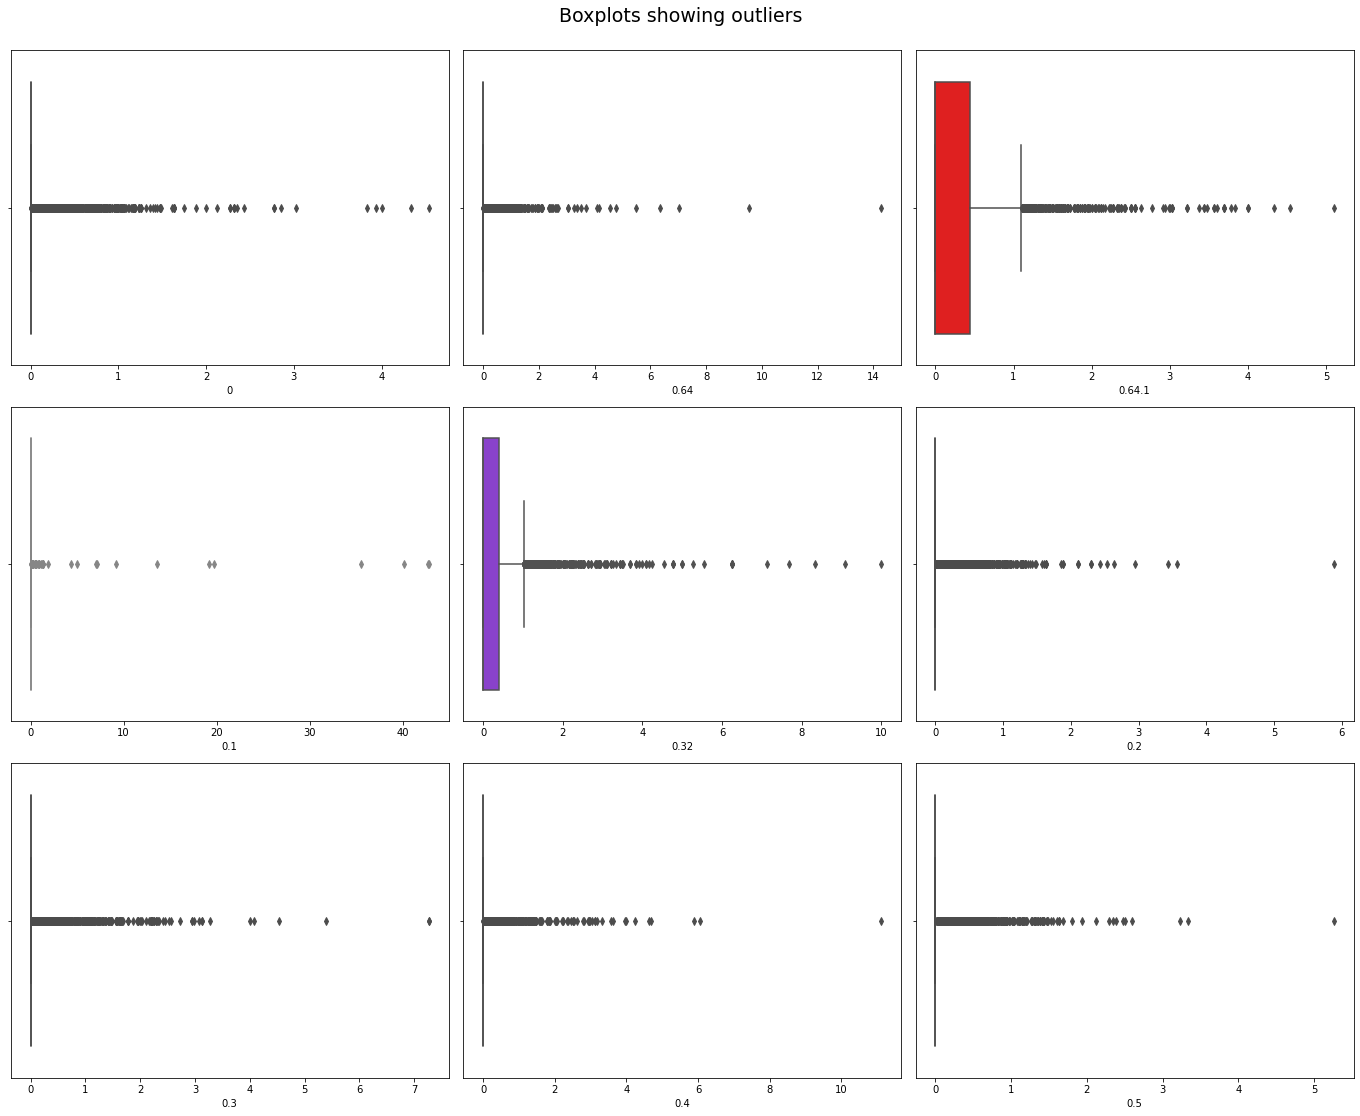

In [244]:
# checking for outliers
fig, axes = plt.subplots(nrows =3, ncols = 3, figsize = (19, 15))
colors = ['limegreen','gold','red', 'pink', 'blueviolet','darkorange','springgreen','limegreen', 'gold', 'red','limegreen','gold','red', 'pink', 'blueviolet','darkorange','springgreen','limegreen', 'gold', 'red','limegreen','gold','red', 'pink', 'blueviolet','darkorange','springgreen','limegreen', 'gold', 'red','limegreen','gold','red', 'pink', 'blueviolet','darkorange','springgreen','limegreen', 'gold', 'red','limegreen','gold','red', 'pink', 'blueviolet','darkorange','springgreen','limegreen', 'gold', 'red','limegreen','gold','red', 'pink', 'blueviolet','darkorange','springgreen','limegreen']
columns = ['0', '0.64', '0.64.1', '0.1', '0.32', '0.2', '0.3', '0.4', '0.5', '0.6',
       '0.7', '0.64.2', '0.8', '0.9', '0.10', '0.32.1', '0.11', '1.29', '1.93',
       '0.12', '0.96', '0.13', '0.14', '0.15', '0.16', '0.17', '0.18', '0.19',
       '0.20', '0.21', '0.22', '0.23', '0.24', '0.25', '0.26', '0.27', '0.28',
       '0.29', '0.30', '0.31', '0.32.2', '0.33', '0.34', '0.35', '0.36',
       '0.37', '0.38', '0.39', '0.40', '0.41', '0.42', '0.778', '0.43', '0.44',
       '3.756', '61', '278', '1']
plt.suptitle('Boxplots showing outliers', y = 1.03, fontsize = 19)
for ax, data, column , color in zip(axes.flatten(), spambase_df, columns, colors):
    sns.boxplot(spambase_df[column], ax = ax, color = color)
plt.tight_layout()


We'll will not take any action to deal with outliers since they contain necessary values for our prediction.

5.Exploratory Data Analysis

Univalent Analysis

In [245]:
#Summary statistics

spambase_df.describe(include='all')

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
count,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.00000,4209.000000
mean,0.104391,0.112530,0.291390,0.063093,0.325322,0.096679,0.117503,0.108026,0.091882,0.248479,...,0.040413,0.144082,0.017380,0.281018,0.076075,0.045809,5.384282,52.137800,291.18508,0.398670
std,0.300036,0.454241,0.515752,1.352647,0.687887,0.276059,0.397327,0.410328,0.282174,0.656705,...,0.252562,0.274280,0.105743,0.843387,0.239734,0.435976,33.151287,199.605834,618.72831,0.489683
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.00000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.627000,7.000000,40.00000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.073000,0.000000,0.016000,0.000000,0.000000,2.297000,15.000000,101.00000,0.000000
75%,0.000000,0.000000,0.440000,0.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.190000,...,0.000000,0.194000,0.000000,0.331000,0.053000,0.000000,3.706000,44.000000,273.00000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.00000,1.000000


In [246]:
# Let's check the frequency distribution of elements in our dataset columns 
for elements in spambase_df.columns:
    
    print(spambase_df[elements].value_counts())

0.00    3227
0.10      40
0.09      35
0.17      34
0.08      31
        ... 
1.36       1
2.35       1
1.01       1
2.12       1
0.88       1
Name: 0, Length: 142, dtype: int64
0.00    3399
0.19      24
0.08      24
0.10      23
0.17      22
        ... 
4.76       1
1.05       1
1.65       1
3.05       1
2.01       1
Name: 0.64, Length: 171, dtype: int64
0.00    2426
0.32      44
0.29      37
0.55      36
0.36      28
        ... 
2.25       1
2.91       1
1.79       1
1.43       1
2.35       1
Name: 0.64.1, Length: 214, dtype: int64
0.00     4163
0.58        2
0.42        2
0.17        2
0.21        2
0.60        1
0.44        1
7.07        1
1.33        1
1.29        1
19.73       1
0.57        1
0.04        1
35.46       1
1.35        1
0.11        1
0.14        1
0.15        1
0.87        1
0.13        1
0.55        1
42.73       1
19.16       1
0.06        1
0.52        1
0.16        1
0.19        1
0.95        1
5.03        1
7.18        1
13.63       1
0.81        1
1.16      

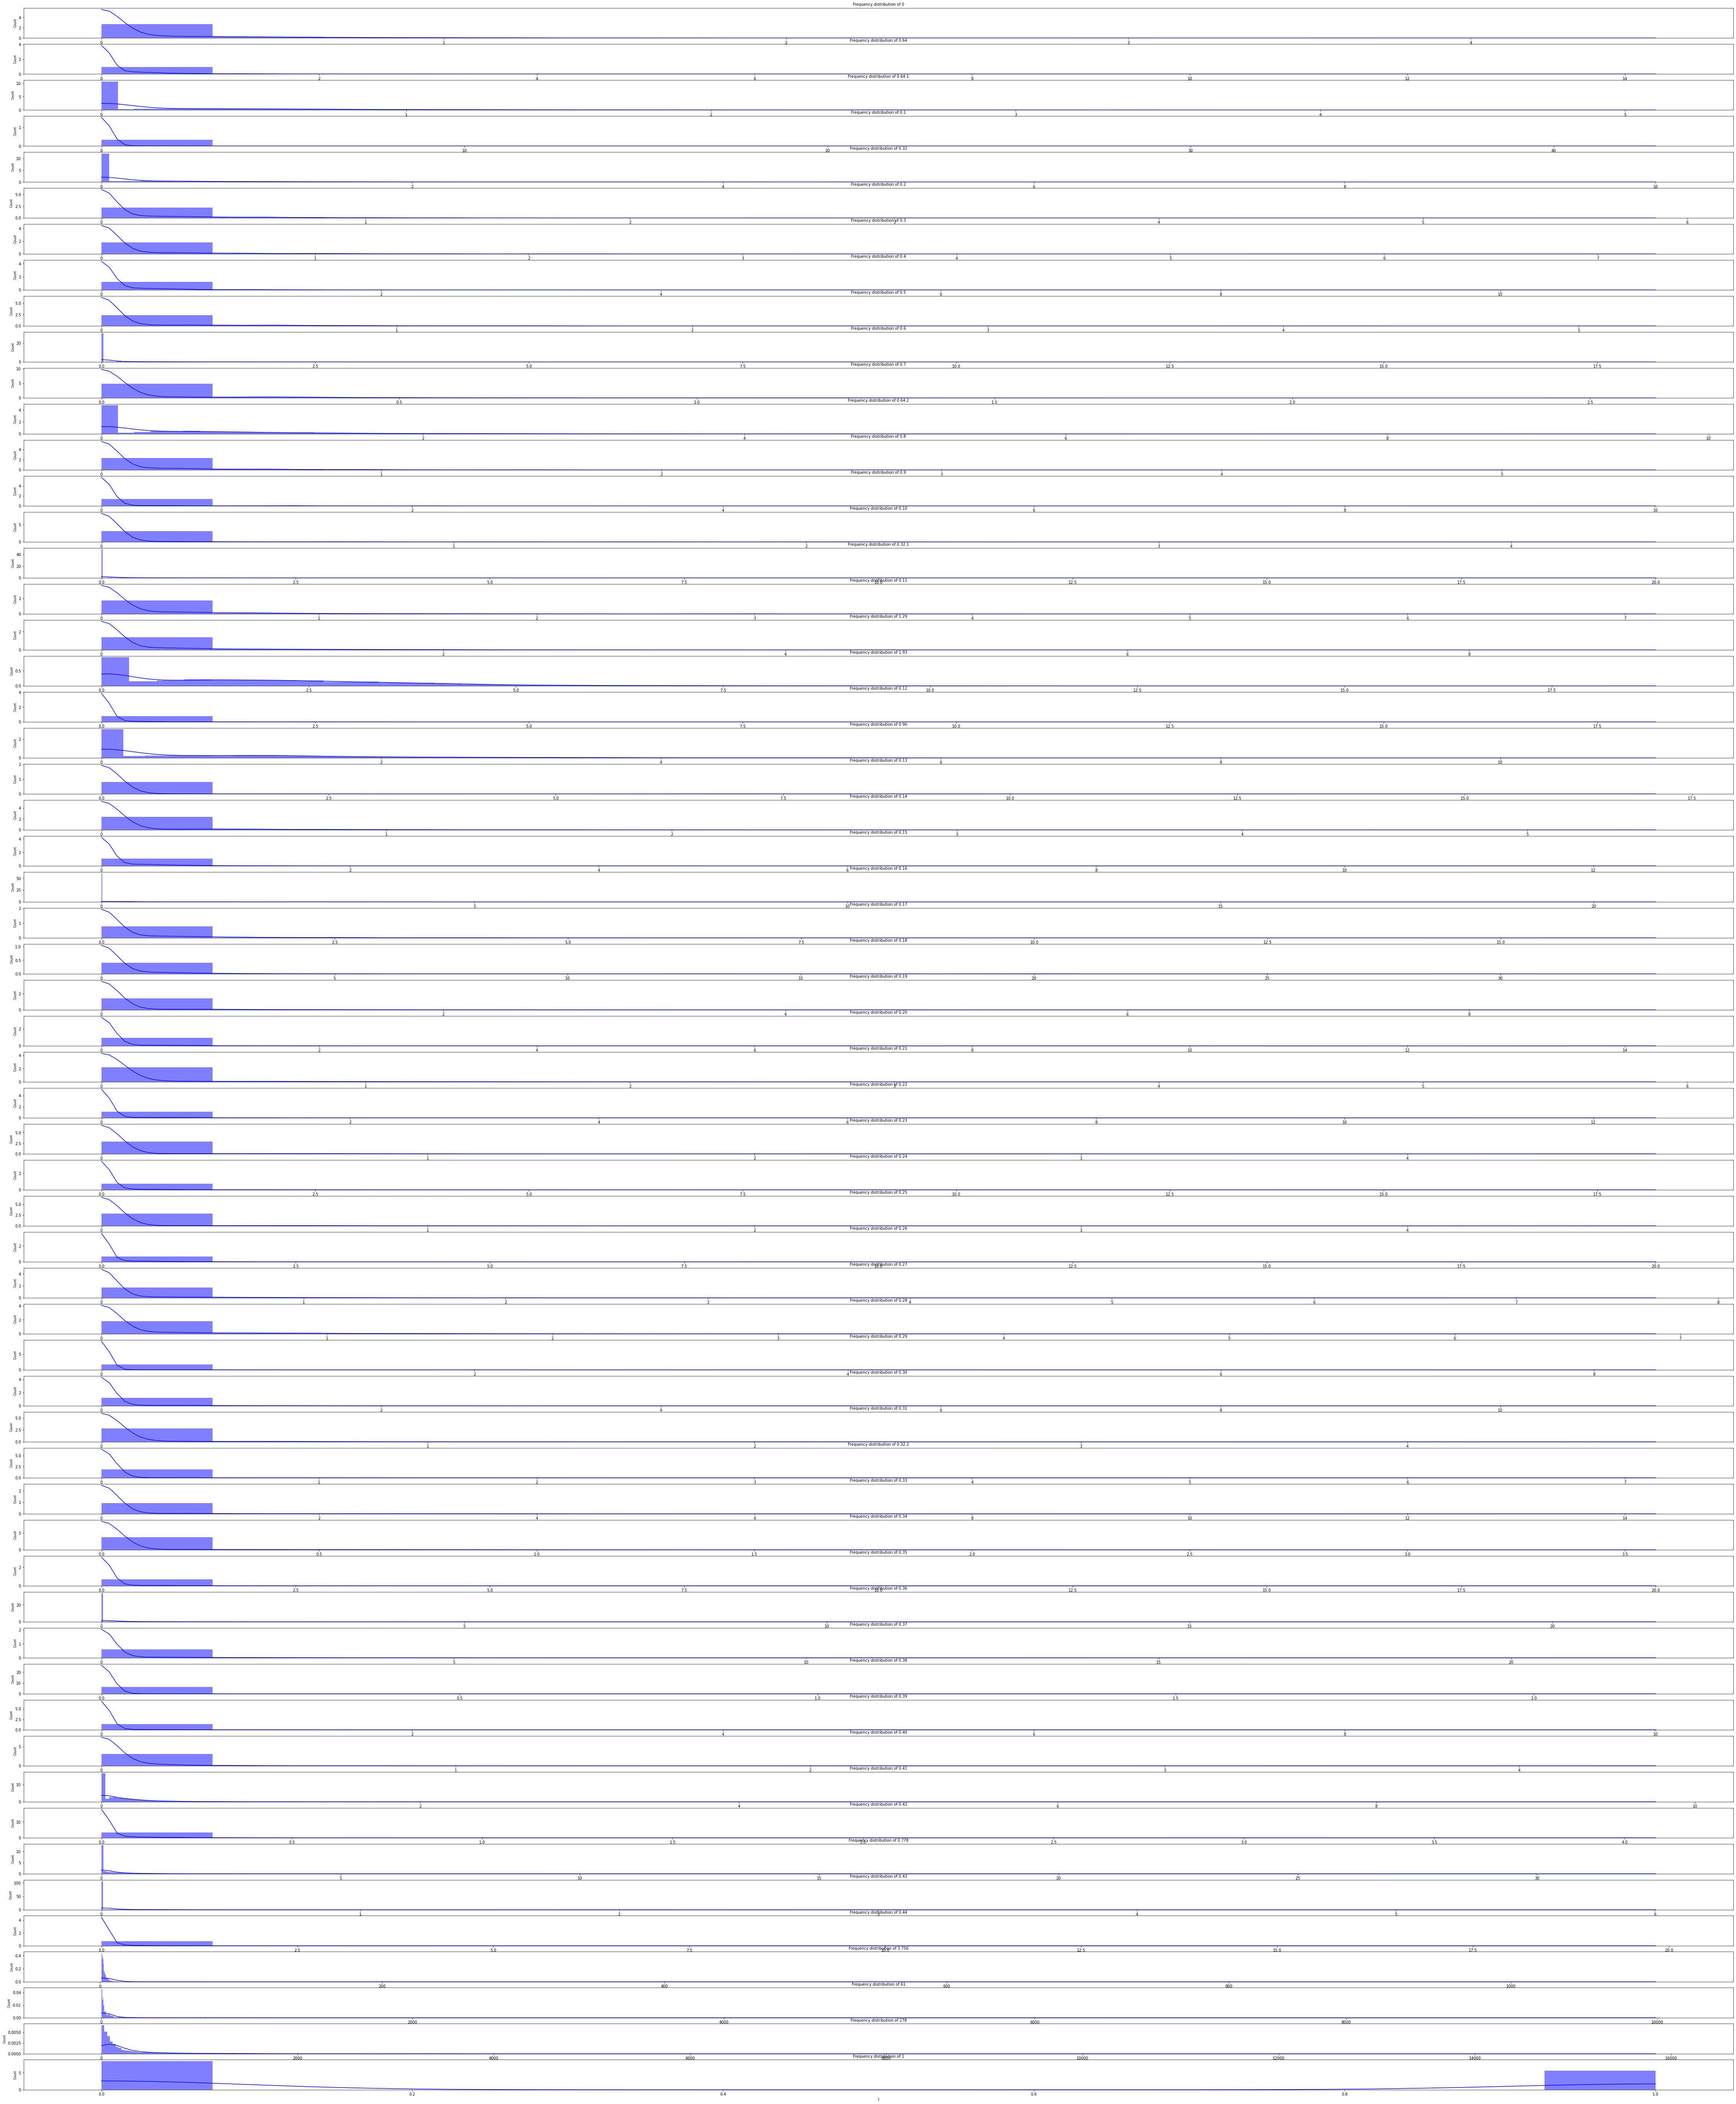

In [247]:
#Visualizing data distribution using histogram
# distribution of numerical variables.
col_names = ['0', '0.64', '0.64.1', '0.1', '0.32', '0.2', '0.3', '0.4', '0.5', '0.6',
       '0.7', '0.64.2', '0.8', '0.9', '0.10', '0.32.1', '0.11', '1.29', '1.93',
       '0.12', '0.96', '0.13', '0.14', '0.15', '0.16', '0.17', '0.18', '0.19',
       '0.20', '0.21', '0.22', '0.23', '0.24', '0.25', '0.26', '0.27', '0.28',
       '0.29', '0.30', '0.31', '0.32.2', '0.33', '0.34', '0.35', '0.36',
       '0.37', '0.38', '0.39', '0.40', '0.41', '0.42', '0.778', '0.43', '0.44',
       '3.756', '61', '278', '1']
fig, ax = plt.subplots(len(col_names), figsize=(80,100))

for i, col_val in enumerate(col_names):

    
    sns.histplot(spambase_df[col_val], color="blue", label="100% Equities", kde=True, stat="density", linewidth=0, ax=ax[i])
    ax[i].set_title('Frequency distribution of '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)
    

plt.show()

Bivalent Analysis

In [248]:
#Summary statistics

spambase_df.describe(include='all')

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
count,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.00000,4209.000000
mean,0.104391,0.112530,0.291390,0.063093,0.325322,0.096679,0.117503,0.108026,0.091882,0.248479,...,0.040413,0.144082,0.017380,0.281018,0.076075,0.045809,5.384282,52.137800,291.18508,0.398670
std,0.300036,0.454241,0.515752,1.352647,0.687887,0.276059,0.397327,0.410328,0.282174,0.656705,...,0.252562,0.274280,0.105743,0.843387,0.239734,0.435976,33.151287,199.605834,618.72831,0.489683
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.00000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.627000,7.000000,40.00000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.073000,0.000000,0.016000,0.000000,0.000000,2.297000,15.000000,101.00000,0.000000
75%,0.000000,0.000000,0.440000,0.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.190000,...,0.000000,0.194000,0.000000,0.331000,0.053000,0.000000,3.706000,44.000000,273.00000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.00000,1.000000


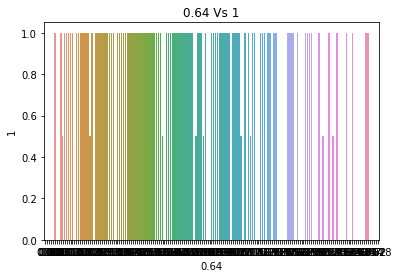

In [249]:
# let's check interdependence of variables
#Visualization of 0.64 versus 1

ax = sns.barplot(x = '0.64', y = '1', data=spambase_df, ci=None, estimator=np.median)
ax.set(xlabel='0.64',
       ylabel='1',
       title='0.64 Vs 1')
plt.show()

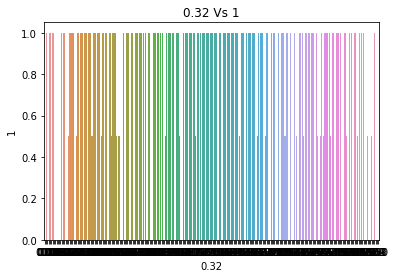

In [250]:
# Visualization of 0.32 versus 1

ax = sns.barplot(x = '0.32', y = '1', data=spambase_df, ci=None, estimator=np.median)
ax.set(xlabel='0.32',
       ylabel='1',
       title='0.32 Vs 1')
plt.show()

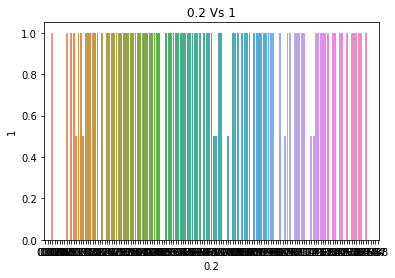

In [251]:
# Visualization of 0.2 versus 1

ax = sns.barplot(x = '0.2', y = '1', data=spambase_df, ci=None, estimator=np.median)
ax.set(xlabel='0.2',
       ylabel='1',
       title='0.2 Vs 1')
plt.show()

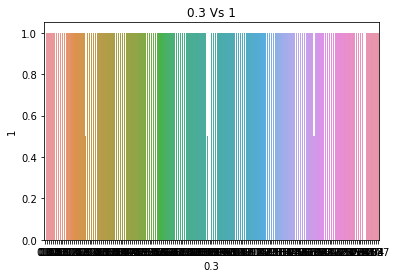

In [252]:
# Visualization of 0.32 versus 1

ax = sns.barplot(x = '0.3', y = '1', data=spambase_df, ci=None, estimator=np.median)
ax.set(xlabel='0.3',
       ylabel='1',
       title='0.3 Vs 1')
plt.show()

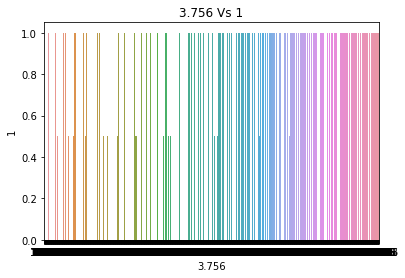

In [253]:
# Visualization of 0.32 versus 1

ax = sns.barplot(x = '3.756', y = '1', data=spambase_df, ci=None, estimator=np.median)
ax.set(xlabel='3.756',
       ylabel='1',
       title='3.756 Vs 1')
plt.show()

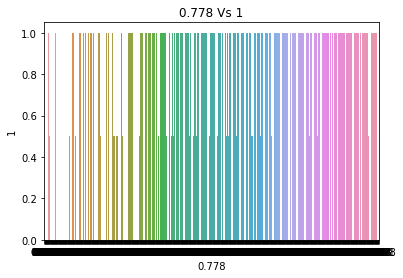

In [254]:
# Visualization of 0.32 versus 1

ax = sns.barplot(x = '0.778', y = '1', data=spambase_df, ci=None, estimator=np.median)
ax.set(xlabel='0.778',
       ylabel='1',
       title='0.778 Vs 1')
plt.show()

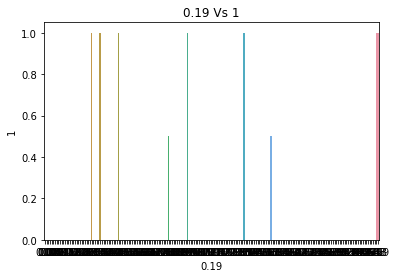

In [255]:
# Visualization of 0.32 versus 1

ax = sns.barplot(x = '0.19', y = '1', data=spambase_df, ci=None, estimator=np.median)
ax.set(xlabel='0.19',
       ylabel='1',
       title='0.19 Vs 1')
plt.show()

In [256]:
# correlation between variables 
spambase_df.corr()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
0,1.000000,0.034114,0.063267,0.005384,0.021740,0.055040,0.011037,-0.004392,0.103818,0.040799,...,-0.027262,-0.019680,-0.034798,0.059236,0.101934,-0.009158,0.044779,0.059132,0.084126,0.129321
0.64,0.034114,1.000000,0.027609,-0.008936,0.036983,0.005623,0.077468,0.013781,0.053525,0.184441,...,0.014782,-0.028209,-0.019394,0.031702,0.044449,0.030702,0.029373,0.053866,0.034601,0.100346
0.64.1,0.063267,0.027609,1.000000,-0.019895,0.065681,0.066608,0.028630,0.007263,0.077618,0.025201,...,-0.036754,-0.024462,-0.035780,0.097231,0.073000,-0.004503,0.095684,0.092511,0.051967,0.172193
0.1,0.005384,-0.008936,-0.019895,1.000000,0.000256,-0.009167,0.014286,0.003798,-0.001044,-0.003849,...,-0.000030,-0.011450,-0.007516,-0.003861,0.008269,0.000133,0.005754,0.022106,0.023784,0.056407
0.32,0.021740,0.036983,0.065681,0.000256,1.000000,0.041392,0.135958,0.023410,0.014482,0.027232,...,-0.035049,-0.054583,-0.027988,0.019205,0.040696,0.002144,0.050832,0.042985,-0.010498,0.230117
0.2,0.055040,0.005623,0.066608,-0.009167,0.041392,1.000000,0.046844,0.079683,0.097012,0.010068,...,-0.021758,-0.011628,-0.016743,0.058173,0.105903,0.020405,-0.013559,0.065714,0.063402,0.212455
0.3,0.011037,0.077468,0.028630,0.014286,0.135958,0.046844,1.000000,0.033675,0.049216,0.055670,...,-0.034092,-0.061357,-0.029478,0.051036,0.067215,0.049300,0.039171,0.050828,-0.017082,0.334605
0.4,-0.004392,0.013781,0.007263,0.003798,0.023410,0.079683,0.033675,1.000000,0.106872,0.079023,...,-0.028986,-0.042785,-0.021393,0.029069,0.053550,-0.008128,0.009974,0.035606,0.036894,0.200780
0.5,0.103818,0.053525,0.077618,-0.001044,0.014482,0.097012,0.049216,0.106872,1.000000,0.123341,...,-0.015016,-0.037420,0.017308,0.035985,0.152436,-0.002084,0.110786,0.166304,0.233199,0.221591
0.6,0.040799,0.184441,0.025201,-0.003849,0.027232,0.010068,0.055670,0.079023,0.123341,1.000000,...,0.006757,-0.005008,0.003785,0.031657,0.077378,0.034473,0.073125,0.101552,0.078587,0.131822


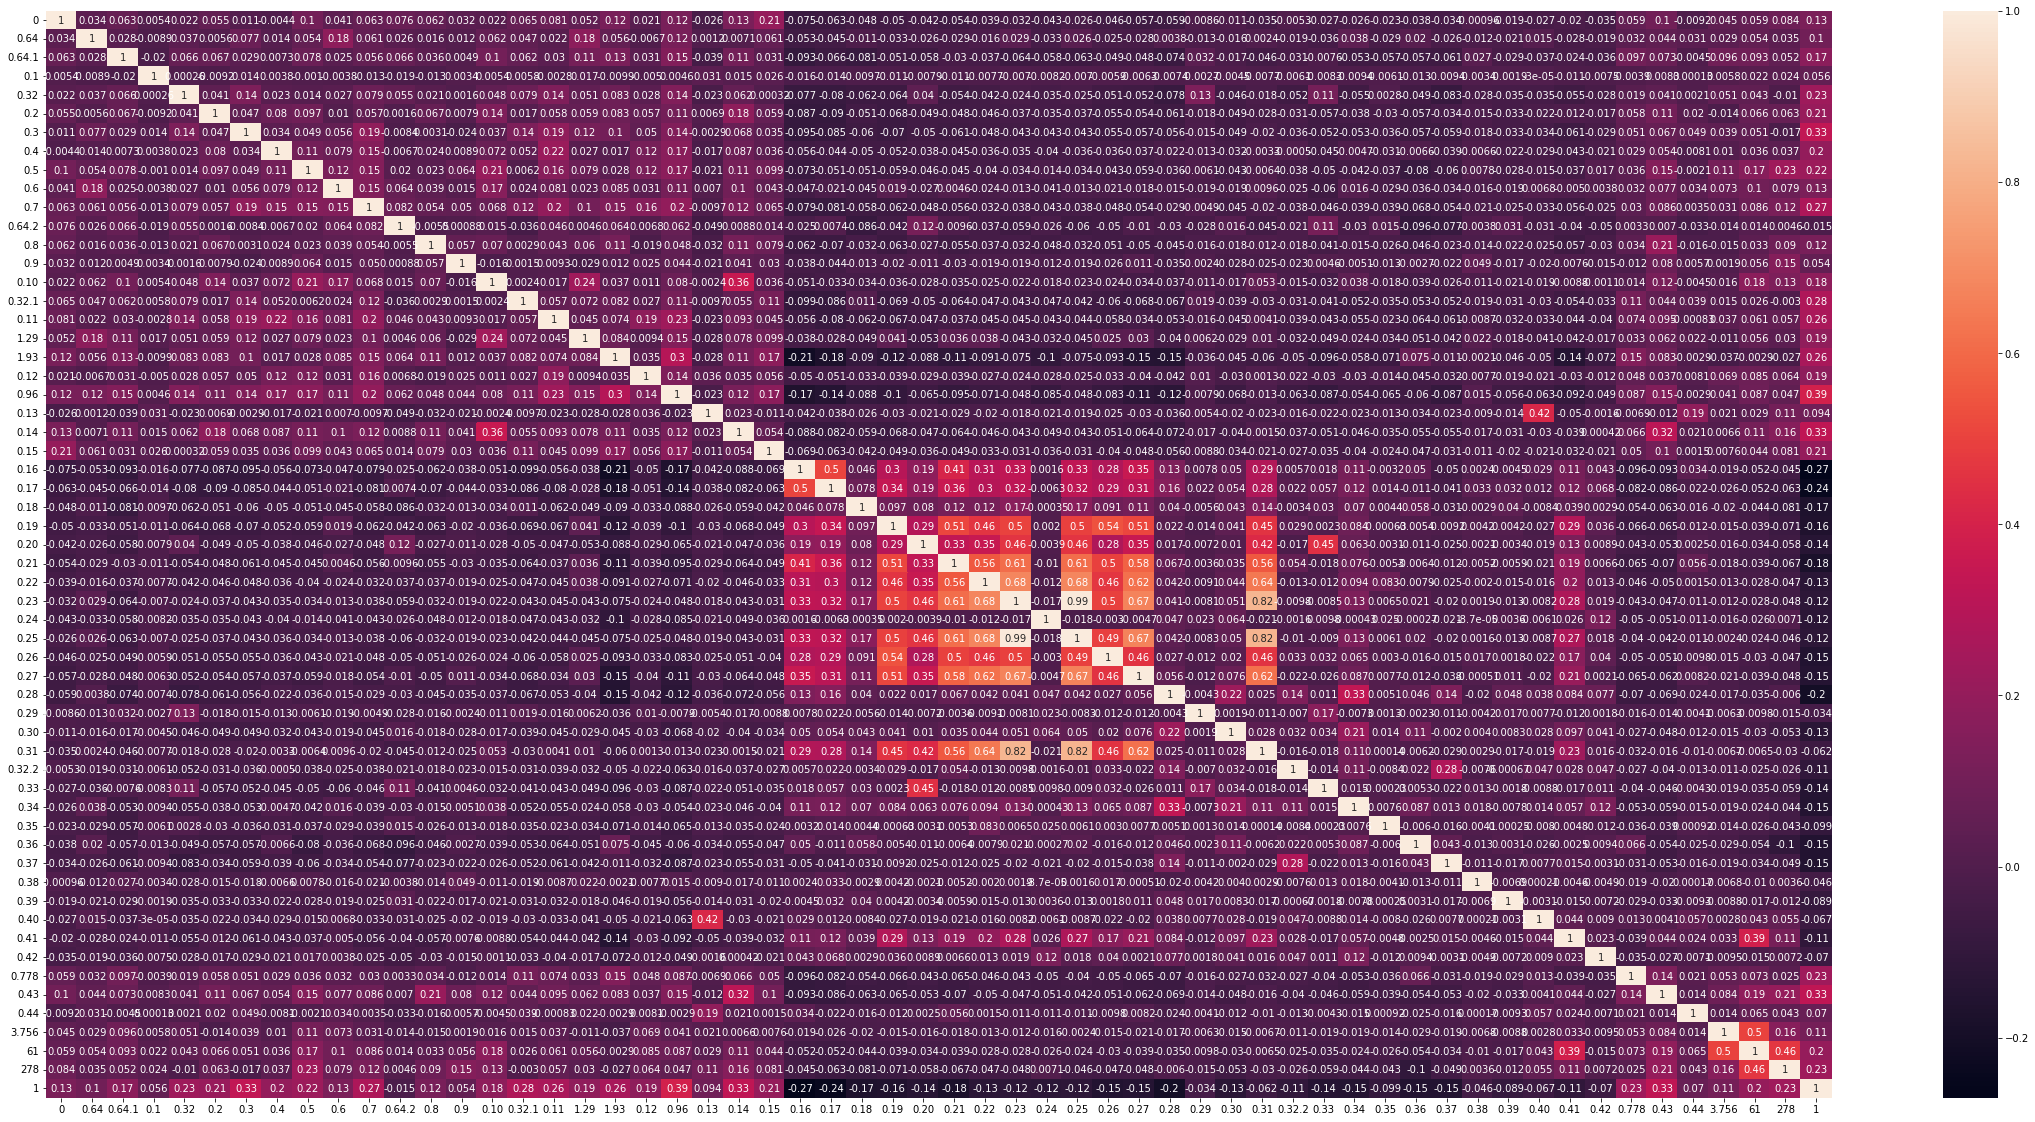

In [257]:
# Heatmap for correlation
plt.figure(figsize=(40, 20))
corr = spambase_df.corr()
sns.heatmap(corr, 
            xticklabels = corr.columns.values,
            yticklabels = corr.columns.values,
            annot = True);

Multivalent Analysis

Principal component analysis

In [258]:
#Separating features and labels 
#preprocessing
X = spambase_df[['0', '0.64', '0.64.1', '0.1', '0.32', '0.2', '0.3', '0.4', '0.5', '0.6',
       '0.7', '0.64.2', '0.8', '0.9', '0.10', '0.32.1', '0.11', '1.29', '1.93',
       '0.12', '0.96', '0.13', '0.14', '0.15', '0.16', '0.17', '0.18', '0.19',
       '0.20', '0.21', '0.22', '0.23', '0.24', '0.25', '0.26', '0.27', '0.28',
       '0.29', '0.30', '0.31', '0.32.2', '0.33', '0.34', '0.35', '0.36',
       '0.37', '0.38', '0.39', '0.40', '0.41', '0.42', '0.778', '0.43', '0.44',
       '3.756', '61', '278']].values
y = spambase_df['1']

In [259]:
#Import the necessary library
from sklearn.model_selection import train_test_split

#Split the data into a training set and testing set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [260]:
#Normalisation
#Import the necessary library
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [261]:
# Using PCA
#Import the necessary library
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [262]:
# checking the explained variance
percentage_explained_variance = pca.explained_variance_ratio_
percentage_explained_variance

array([1.09438882e-01, 5.70538530e-02, 3.55437465e-02, 2.86034647e-02,
       2.68004750e-02, 2.58628882e-02, 2.51847966e-02, 2.40043341e-02,
       2.32167760e-02, 2.19143344e-02, 2.17518650e-02, 2.04374577e-02,
       1.97097734e-02, 1.95242447e-02, 1.91695313e-02, 1.86068158e-02,
       1.85459259e-02, 1.79520627e-02, 1.77497465e-02, 1.75717224e-02,
       1.73272098e-02, 1.69379263e-02, 1.68632613e-02, 1.65078776e-02,
       1.64101672e-02, 1.62376389e-02, 1.58815070e-02, 1.56667078e-02,
       1.51971559e-02, 1.50628381e-02, 1.45261190e-02, 1.43874983e-02,
       1.42171073e-02, 1.39973425e-02, 1.36080108e-02, 1.33450850e-02,
       1.29984084e-02, 1.28939392e-02, 1.27845200e-02, 1.23920679e-02,
       1.17816440e-02, 1.15663171e-02, 1.11685776e-02, 1.04923272e-02,
       1.00533660e-02, 9.84005882e-03, 9.09701108e-03, 8.61801739e-03,
       8.12843936e-03, 7.82663421e-03, 7.55710562e-03, 6.90509243e-03,
       6.83536073e-03, 5.73584866e-03, 4.39387107e-03, 4.00688241e-03,
      

6. Implementing the Solution

        We'll implement the model using Gaussian Naive Bayes *Classifier*
           # This type of classifier makes the assumption of normal distribution
           # thus it can be best used in our case since all our features are continuous
           

In [263]:
# Load libraries and datasets to be used 
#
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

        splitting the dataset:80-20 partition





In [264]:
# Splitting our data into a training set and a test set
# 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6) 

In [265]:
# Training our model
# 
clf = GaussianNB()  
model = clf.fit(X_train, y_train) 

In [266]:
# Predicting our test predictors
predicted = model.predict(X_test)
print(np.mean(predicted == y_test))

0.8242280285035629


In [267]:
# Predicting a new observation
new_obser = [[ 60,70,63,10,  3,  4,  0.4,1,2,3,4,5,6,7,8,9,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51]]

new_pred = model.predict(new_obser)
new_pred

array([0])

        splitting the dataset:70-30 partition

In [268]:
# Splitting our data into a training set and a test set
# 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=6) 

In [269]:
# Training our model
# 
clf1 = GaussianNB()  
model1 = clf1.fit(X_train, y_train) 

In [270]:
# Predicting our test predictors
predicted = model1.predict(X_test)
print(np.mean(predicted == y_test))

0.8202692003167062


In [271]:
# Predicting a new observation
new_obser = [[ 60, 70, 63, 10,  3,  4,  0.4, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51]]

new_pred = model1.predict(new_obser)
new_pred

array([0])

      splitting the dataset:60-40 partition





In [272]:
# Splitting our data into a training set and a test set
# 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=6) 

In [273]:
# Training our model
# 
clf2 = GaussianNB()  
model2 = clf2.fit(X_train, y_train) 

In [274]:
# Predicting our test predictors
predicted = model2.predict(X_test)
print(np.mean(predicted == y_test))

0.830166270783848


In [275]:
# Predicting a new observation
new_obser = [[ 60, 70, 63, 10,  3,  4,  0.4, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51]]

new_pred = model2.predict(new_obser)
new_pred

array([0])

Optimization Through  removing  redundant/correlated features as part of feature selection

     Best model - Splitted 70-30

In [276]:
# Create correlation matrix
corr_matrix = spambase_df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

In [277]:
# Drop features 
spambase_df.drop(spambase_df[to_drop], axis=1)

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.000,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4596,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4597,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4598,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [278]:
# Splitting our data into a training set and a test set
# 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=6) 

In [279]:
# Training our model
# 
clf3 = GaussianNB()  
model3 = clf3.fit(X_train, y_train) 

In [280]:
# Predicting our test predictors
predicted = model3.predict(X_test)
print(np.mean(predicted == y_test))


0.8202692003167062


In [281]:
# Predicting a new observation
new_obser = [[ 60, 70, 63, 10,  3,  4,  0.4, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51]]

new_pred = model3.predict(new_obser)
new_pred

array([0])

Conclusion

The study resulted into the following accuracy scores.

1. 80- 20 - Recorded Model Accuracy Score is 0.8242280285035629
2. 70- 30 - Recorded Model Accuracy Score is 0.8202692003167062
3. 60- 40 - Recorded Model Accuracy Score is 0.830166270783848

As observed, the best model was the one splitted into 70- 30.
After performing  optimization by dropping highly coorelted columns the model sightly Improved.
